**Audio Classification using DL**
-----

Dataset url: https://urbansounddataset.weebly.com/urbansound8k.html

In [109]:
%pip install librosa

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline


In [111]:
filename = 'Dog Barking Notification.mp3'

In [112]:
import IPython.display as ipd
import librosa
import librosa.display

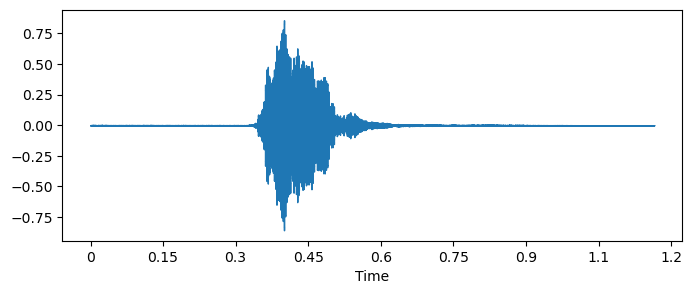

In [113]:
plt.figure(figsize=(8, 3))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

In [114]:
sample_rate

22050

In [115]:
import pandas as pd

metadata=pd.read_csv('metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [116]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

**Data Processing**
----

In [117]:
import librosa
audio_file_path='7061-6-0-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)


In [118]:
print(librosa_audio_data)

[-7.4505806e-09  2.9802322e-08  4.8428774e-08 ...  1.0127544e-05
  2.3271263e-05  7.0009992e-06]


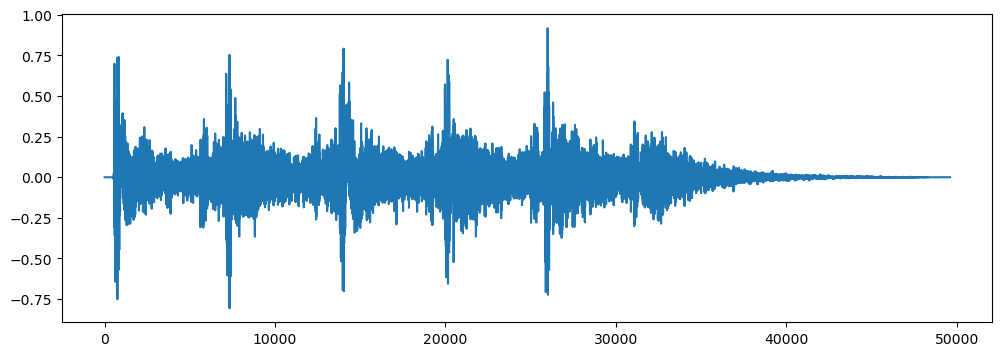

In [119]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

**Observation**
---
Librosa converts the signal to mono, i.e. both the audios will run on same channel. 

In [120]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [121]:
wave_audio

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [1, 0],
       [1, 1],
       [0, 0]], dtype=int16)

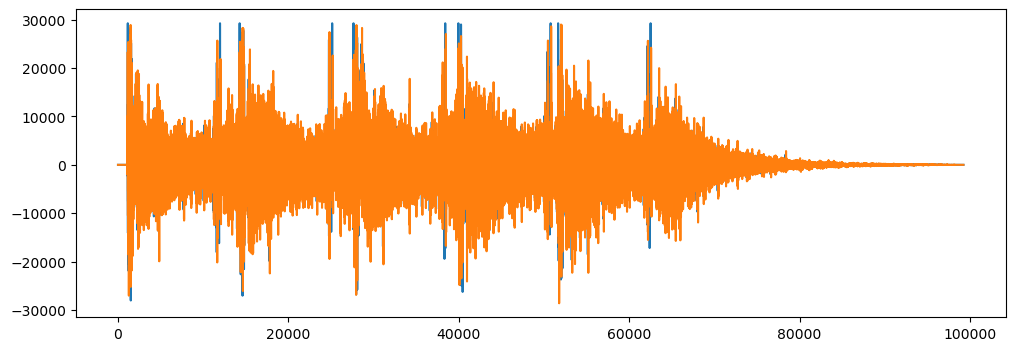

In [122]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

**Extract Features**
----

In [123]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 97)


In [124]:
mfccs

array([[-1.2721312e+02,  8.0479240e+00,  1.6004412e+01, ...,
        -5.6935333e+02, -5.9172754e+02, -6.1065784e+02],
       [ 3.0020668e+01,  2.2940346e+01,  1.0669682e+01, ...,
         4.3051193e+01,  2.5888042e+01,  1.2829786e+01],
       [-2.5360155e+00, -1.1252435e+01, -1.4259802e+01, ...,
        -1.1103722e+01, -7.5506272e+00,  2.0151812e-01],
       ...,
       [ 3.2335889e-01, -3.5481031e+00, -5.0293417e+00, ...,
         2.4095786e+00,  3.1699724e+00, -2.1270448e-01],
       [-9.7800598e+00, -9.0905123e+00, -6.1912656e+00, ...,
        -5.0198019e-02,  7.2895038e-01, -9.0055263e-01],
       [ 1.6566076e+00,  1.8223333e+00,  2.8306208e+00, ...,
        -2.0609212e+00, -2.2312646e+00, -1.7745862e+00]], dtype=float32)

In [125]:
import pandas as pd
import os
import librosa

audio_dataset_path='audio/'
metadata=pd.read_csv('metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [126]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [127]:
%pip install resampy

In [128]:
import numpy as np
from tqdm import tqdm
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data = features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3553it [03:28, 21.17it/s]c:\Users\Krish\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [07:02, 32.23it/s]c:\Users\Krish\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
c:\Users\Krish\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [07:20, 19.84it/s]


In [129]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()


,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [130]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [131]:
X.shape

(8732, 40)

In [132]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [133]:
y.shape

(8732, 10)

In [134]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [135]:
X_train.shape

(6985, 40)

In [136]:
X_test.shape

(1747, 40)

In [137]:
y_train.shape

(6985, 10)

In [138]:
y_test.shape

(1747, 10)

**Model Creation**
-----

In [139]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [140]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [141]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [142]:
### No of classes
num_labels=y.shape[1]

In [143]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [144]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               4100      
                                                                 
 activation_8 (Activation)   (None, 100)               0         
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 200)               20200     
                                                                 
 activation_9 (Activation)   (None, 200)               0         
                                                                 
 dropout_7 (Dropout)         (None, 200)               0         
                                                                 
 dense_10 (Dense)            (None, 100)              

In [145]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [146]:
## Training the model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
205/219 [===========================>..] - ETA: 0s - loss: 12.4249 - accuracy: 0.1223
Epoch 1: val_loss improved from inf to 2.28424, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 11.8778 - accuracy: 0.1220 - val_loss: 2.2842 - val_accuracy: 0.1191
Epoch 2/100
 86/219 [==========>...................] - ETA: 0s - loss: 2.8658 - accuracy: 0.1203

c:\Users\Krish\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


200/219 [==========================>...] - ETA: 0s - loss: 2.6591 - accuracy: 0.1197
Epoch 2: val_loss improved from 2.28424 to 2.28165, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 2.6438 - accuracy: 0.1193 - val_loss: 2.2816 - val_accuracy: 0.1070
Epoch 3/100
206/219 [===========================>..] - ETA: 0s - loss: 2.3614 - accuracy: 0.1221
Epoch 3: val_loss improved from 2.28165 to 2.27533, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 2.3591 - accuracy: 0.1220 - val_loss: 2.2753 - val_accuracy: 0.1048
Epoch 4/100
205/219 [===========================>..] - ETA: 0s - loss: 2.2859 - accuracy: 0.1323
Epoch 4: val_loss improved from 2.27533 to 2.25955, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 2.2868 - accuracy: 0.1336 - val_loss: 2.2595 - val_accuracy: 0.1334
Epoch 5

In [147]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7676016092300415


In [148]:
filename = 'Dog Barking Notification.mp3'
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)

import numpy as np


predictions = model.predict(prediction_feature)  
predicted_classes = np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 77ms/step


In [149]:
prediction_feature.shape

(1, 40)

In [150]:
X_test[1]

array([-466.17957   ,    1.0950238 ,  -34.01389   ,   35.33935   ,
        -14.88148   ,  -19.12843   ,   -0.581684  ,  -16.130579  ,
        -21.339075  ,    7.673634  ,  -29.16449   ,  -18.950253  ,
         -2.9579995 ,   -8.16233   ,  -15.153101  ,   -6.604805  ,
         -7.5685983 ,    9.340646  ,   14.4331    ,   21.934181  ,
         20.861397  ,    1.3340122 ,  -19.228804  ,   -4.630231  ,
         -1.0564744 ,    3.215267  ,   -6.984281  ,  -16.414577  ,
        -10.0286455 ,   13.009954  ,    0.53346074,  -23.843391  ,
        -15.267321  ,    9.245734  ,   10.367627  ,   -0.58320105,
         -1.2624055 ,   17.700016  ,   13.847463  ,   -5.1862826 ],
      dtype=float32)

In [155]:
predictions = model.predict(prediction_feature)  
predicted_classes = np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 38ms/step


In [156]:
predicted_classes

array([1], dtype=int64)

**Testing the data**
-----

Steps

-> Preprocess the new audio data \
-> predict the classes\
-> Invere transform your Predicted Label

In [158]:
filename="Dog Barking Notification.mp3"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predictions = model.predict(mfccs_scaled_features)  
predicted_label = np.argmax(predictions, axis=1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class
print("The predicted class is:",prediction_class[0], '\n')

[-457.89682      58.35185     -18.645622    -29.232828    -14.029275
  -15.244957    -25.41594      -2.5206249    -2.5940049    -9.581139
   -8.568184     -0.5803217    -5.0677915    -8.032838      0.52710146
    2.4295514     4.5176       11.233229     14.01177       6.918177
   -5.010011     -5.917525     -5.267279      3.8385394    -3.1636977
   -0.9907661     2.0369658     2.1277862    -1.5371923     2.5923963
   -0.5136587     0.4739292     2.112746      5.1968637     3.7943096
   -1.0315965     1.7089323     2.0941029     0.6566089    -4.2988687 ]
[[-457.89682      58.35185     -18.645622    -29.232828    -14.029275
   -15.244957    -25.41594      -2.5206249    -2.5940049    -9.581139
    -8.568184     -0.5803217    -5.0677915    -8.032838      0.52710146
     2.4295514     4.5176       11.233229     14.01177       6.918177
    -5.010011     -5.917525     -5.267279      3.8385394    -3.1636977
    -0.9907661     2.0369658     2.1277862    -1.5371923     2.5923963
    -0.5136587  